<a href="https://colab.research.google.com/github/Raghasreya/iris-flower-classification/blob/main/sreya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd # Import the pandas library

# Assuming your data is in a CSV file named 'IRIS.csv'
df = pd.read_csv('IRIS.csv') # Load your data into the df variable

# Create the 'spotted' column based on the new condition
df['spotted'] = df.apply(lambda row: 1 if (row['petal_length'] > 4 and row['petal_width'] > 1.5) else 0, axis=1)

In [ ]:
df

,sepal_length,sepal_width,petal_length,petal_width,species,spotted
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,1
146,6.3,2.5,5.0,1.9,Iris-virginica,1
147,6.5,3.0,5.2,2.0,Iris-virginica,1
148,6.2,3.4,5.4,2.3,Iris-virginica,1


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [ ]:
scaler=StandardScaler()
df[['sepal_length','sepal_width','petal_length','petal_width']]=scaler.fit_transform(df[['sepal_length','sepal_width','petal_length','petal_width']])

In [ ]:
le=LabelEncoder()
df['species']=le.fit_transform(df['species'])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y_species = df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y_species, test_size=0.2, random_state=42)

# Training for species classification

In [ ]:
model_species = RandomForestClassifier()
model_species.fit(X_train, y_train)
y_pred = model_species.predict(X_test)
print("Species Classification Report:")
print(classification_report(y_test, y_pred))

Species Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# Training for spotted classification

In [ ]:
y_spotting = df['spotted']
X_train, X_test, y_train, y_test = train_test_split(X, y_spotting, test_size=0.2, random_state=42)

In [ ]:
model_spotting = RandomForestClassifier()
model_spotting.fit(X_train, y_train)
y_pred_spotting = model_spotting.predict(X_test)
print("Spotting Classification Report:")
print(classification_report(y_test, y_pred_spotting))

Spotting Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        12

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



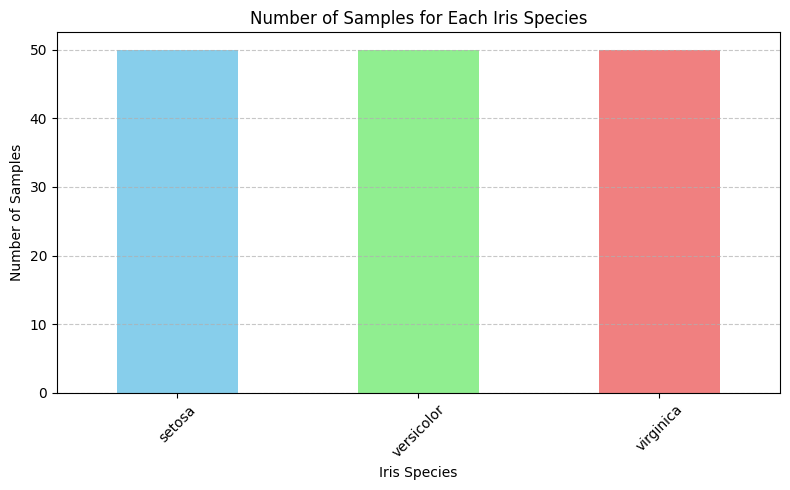

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the iris dataset from sklearn
from sklearn.datasets import load_iris
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Count the number of occurrences of each species
species_counts = iris_df['species'].value_counts()

# Create a bar graph to visualize the counts of each iris species
plt.figure(figsize=(8, 5))
species_counts.plot(kind='bar', color=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Number of Samples for Each Iris Species')
plt.xlabel('Iris Species')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

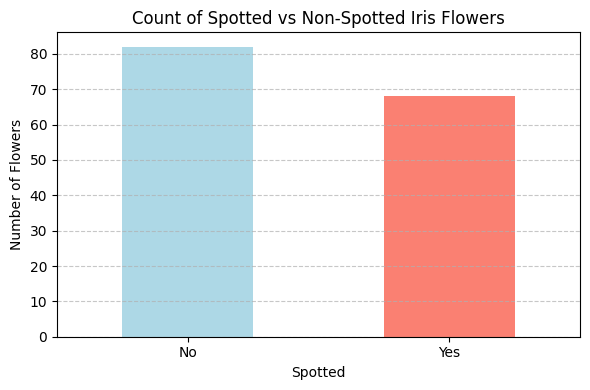

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load the iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# For demonstration, let's add a 'spotted' column randomly
import numpy as np

np.random.seed(42)  # For reproducibility
iris_df['spotted'] = np.random.choice(['Yes', 'No'], size=iris_df.shape[0])

# Count the number of occurrences for spotted vs non-spotted flowers
spotted_counts = iris_df['spotted'].value_counts()

# Create a bar graph to visualize spotted classification
plt.figure(figsize=(6, 4))
spotted_counts.plot(kind='bar', color=['lightblue', 'salmon'])
plt.title('Count of Spotted vs Non-Spotted Iris Flowers')
plt.xlabel('Spotted')
plt.ylabel('Number of Flowers')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()